In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import files
upload=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv
Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [8]:
training=pd.read_csv("SalaryData_Train(1).csv")
training

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
training.shape

(30161, 14)

In [10]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
training.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
training.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
column_names = training.columns
for col in column_names:
 i=training[col].value_counts()
 print(i)
 print('##############################################################')

36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
##############################################################
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
##############################################################
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
##############################################################
9     9840
10    6677
13    5044
14    1627
11    1307
7     104

In [14]:
# List continuous columns
continuous_columns = [col for col in training.columns if pd.api.types.is_numeric_dtype(training[col])]

In [15]:
# List categorical columns
categorical_columns = [col for col in training.columns if training[col].dtype == 'object' or pd.api.types.is_categorical_dtype(training[col])]

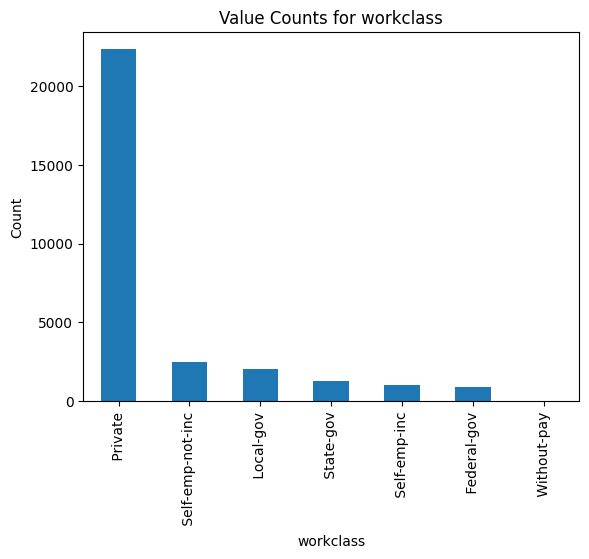

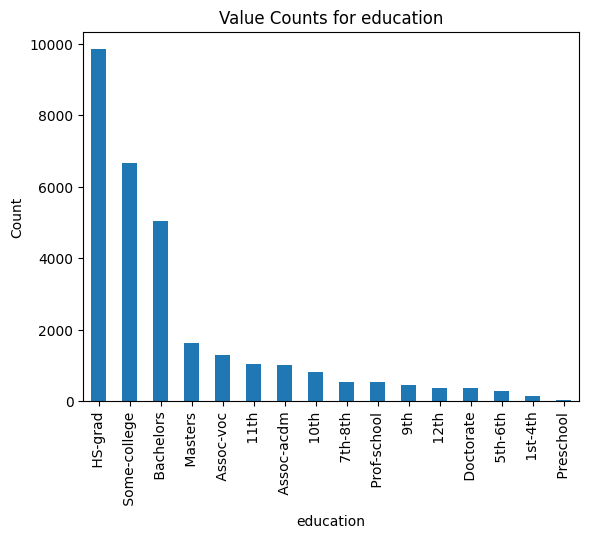

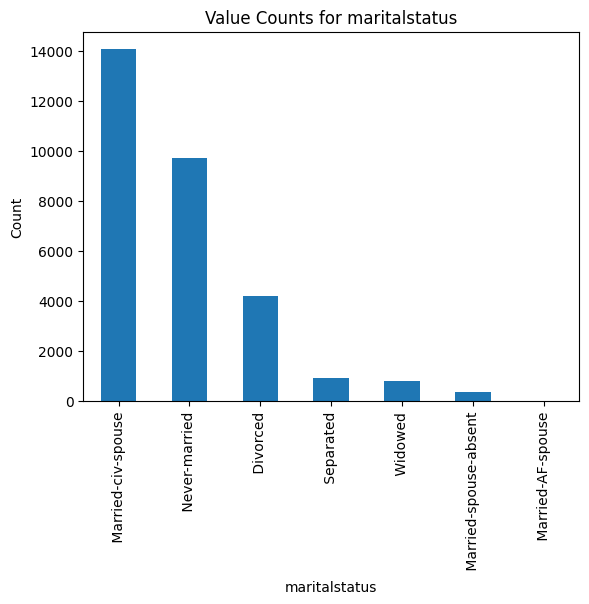

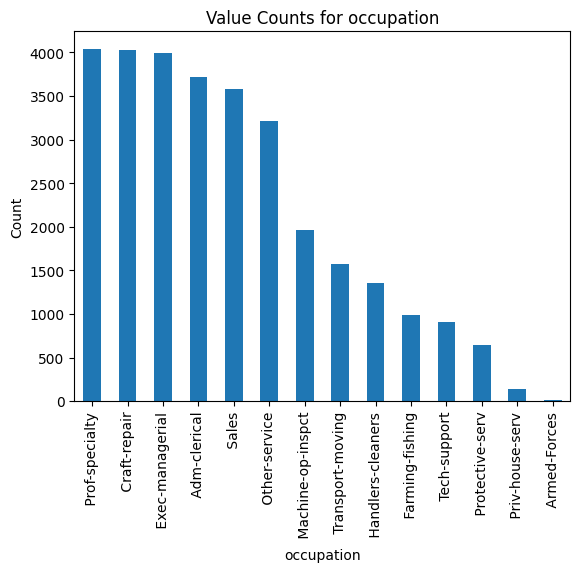

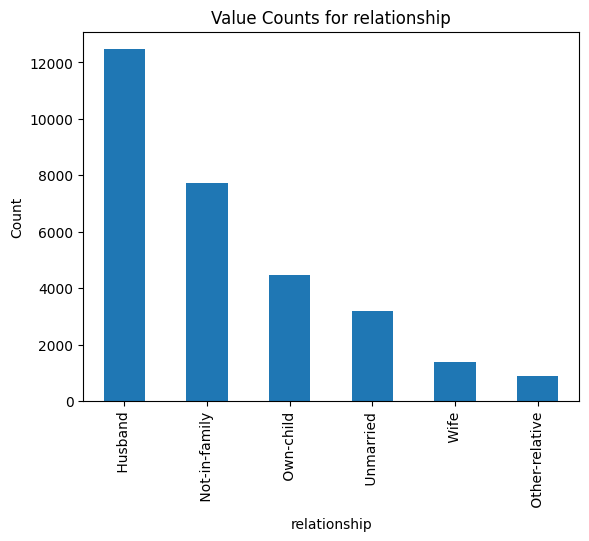

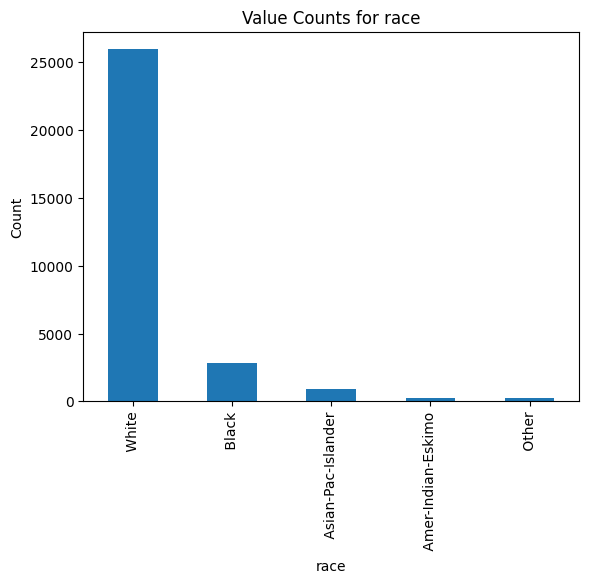

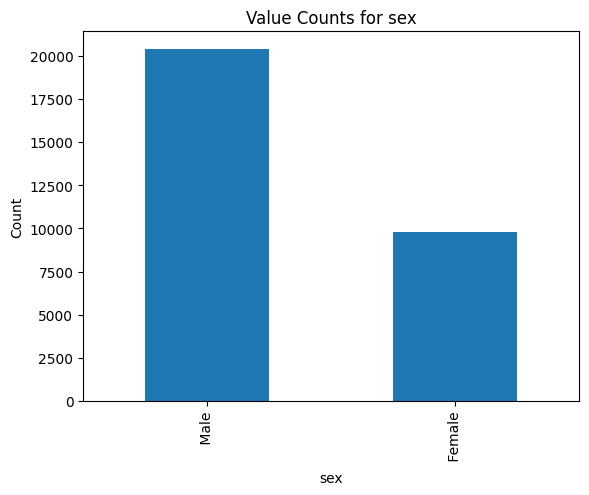

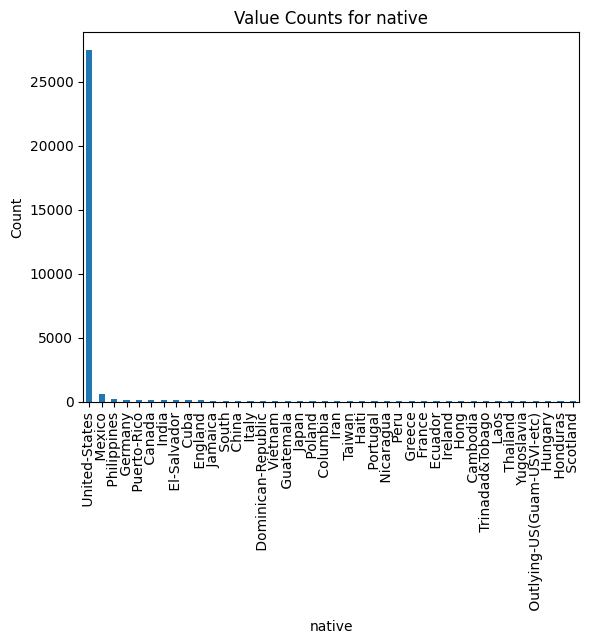

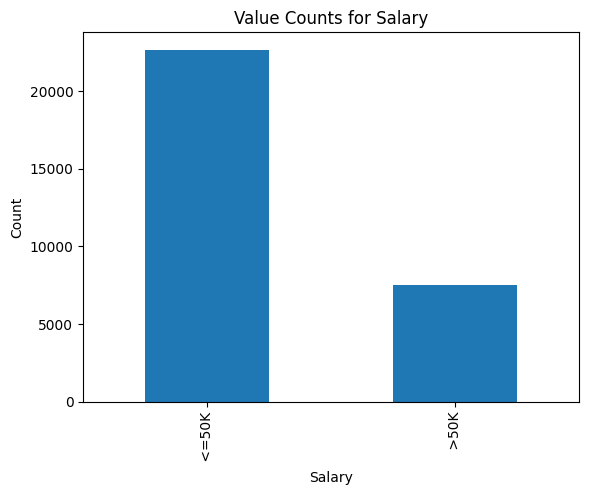

In [18]:
for col in categorical_columns:
    value_counts = training[col].value_counts()
    value_counts.plot(kind='bar')
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Standardization of Data

In [22]:
X=training.drop(['Salary'], axis=1)
Y=training['Salary']

In [23]:
cont_cols = [col for col in X.columns if pd.api.types.is_numeric_dtype(X[col])]
cat_cols = [col for col in X.columns if X[col].dtype == 'object' or pd.api.types.is_categorical_dtype(X[col])]

In [24]:
print(cont_cols)
print(cat_cols)

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']
['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']


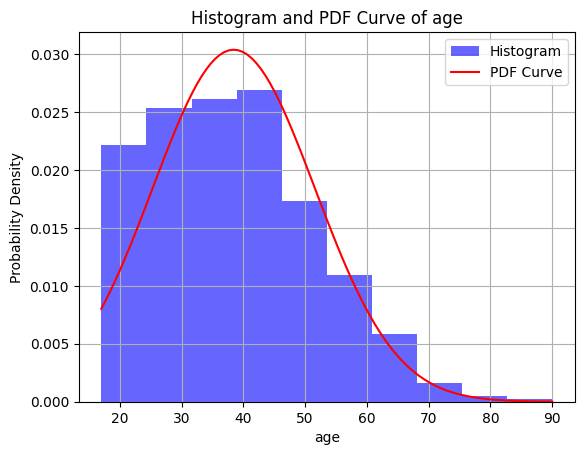

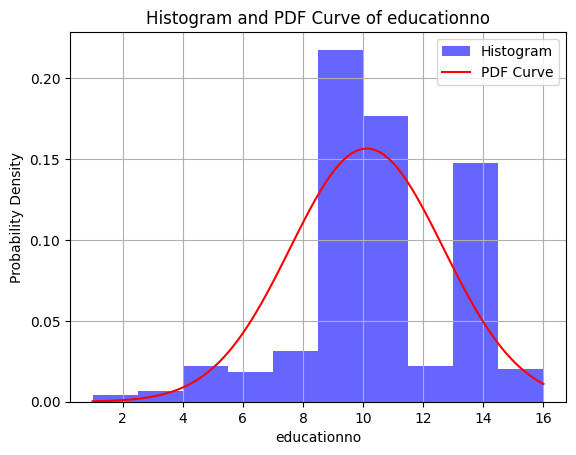

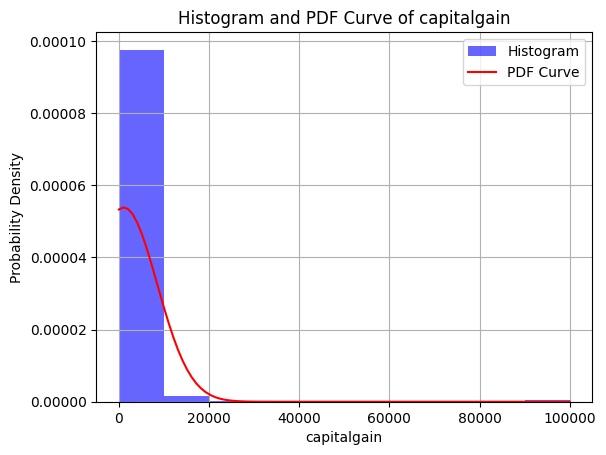

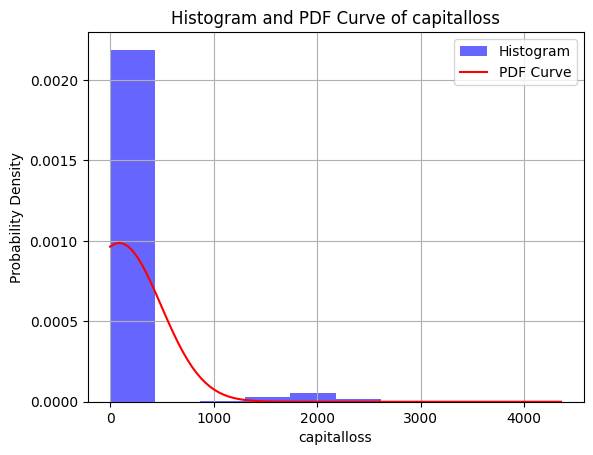

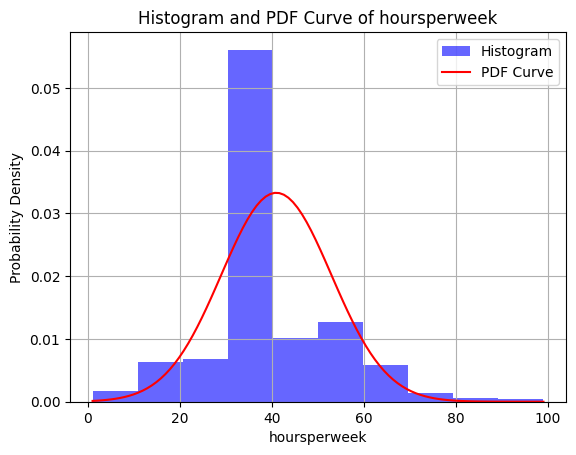

In [27]:
for col in cont_cols:
    X[col].hist(density=True, alpha=0.6, color='b', label='Histogram')

    # Compute the PDF curve
    mu, std = X[col].mean(), X[col].std()
    x = np.linspace(X[col].min(), X[col].max(), 100)
    pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)

    # Plot the PDF curve
    plt.plot(x, pdf, 'r', label='PDF Curve')

    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Probability Density')
    plt.title(f'Histogram and PDF Curve of {col}')
    plt.legend()

    # Show the histogram with the curve
    plt.show()

In [31]:
X1=X[cont_cols]
X2=X[cat_cols]
# Standardize continuous columns in X
SS=StandardScaler()
X1 = SS.fit_transform(X1)
# Label encode categorical columns in X
LE= LabelEncoder()
for col in cat_cols:
    X2[col] = LE.fit_transform(X2[col])
X1=pd.DataFrame(X1)
X1.columns=cont_cols
X2=pd.DataFrame(X2)
X_new=pd.concat([X1,X2],axis=1)
X_new.head()
Y=pd.DataFrame(LE.fit_transform(Y))

<ipython-input-31-bdfd0f44ec85>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[col] = LE.fit_transform(X2[col])
<ipython-input-31-bdfd0f44ec85>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[col] = LE.fit_transform(X2[col])
<ipython-input-31-bdfd0f44ec85>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

# Modelling: SVM Classifier

In [35]:
svc = SVC(C=1.0,kernel='linear')
svc.fit(X_new, Y)
Y_pred_train = svc.predict(X_new)
ac1 = accuracy_score(Y, Y_pred_train)
print("Train accuracy score : ",ac1.round(4))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy score :  0.8107


#Metrics: Testing Accuracy

In [37]:
test_data= pd.read_csv('SalaryData_Test(1).csv')
test_data.shape

(15060, 14)

In [38]:
test_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [40]:
X_test=test_data.drop(['Salary'],axis=1)
Y_test=test_data['Salary']

In [41]:
X1=X_test[cont_cols]
X2=X_test[cat_cols]
# Standardize continuous columns in X
X1 = SS.fit_transform(X1)
# Label encode categorical columns in X
for col in cat_cols:
    X2[col] = LE.fit_transform(X2[col])
X1=pd.DataFrame(X1)
X1.columns=cont_cols
X2=pd.DataFrame(X2)
Xt_new=pd.concat([X1,X2],axis=1)
Xt_new.head()
Y_test=pd.DataFrame(LE.fit_transform(Y_test))

<ipython-input-41-da8239d168cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[col] = LE.fit_transform(X2[col])
<ipython-input-41-da8239d168cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[col] = LE.fit_transform(X2[col])
<ipython-input-41-da8239d168cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [44]:
Y_pred_test= svc.predict(Xt_new)

In [45]:
ac2 = accuracy_score(Y_test, Y_pred_test)
print("Test accuracy score : ",ac2.round(4))

Test accuracy score :  0.809


The support vector classifier is in good level as the model has good training and test accuracy scores of approximately 0.81